<a href="https://colab.research.google.com/github/jeyasheelarakkini344/Classificationofpoolofminerswithdeeplearning/blob/main/12october.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [189]:
import pandas as pd
import numpy as np
import math
import statsmodels.api as sts
from sklearn.model_selection import train_test_split

import scipy.stats as stats
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [190]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import f_regression as fs
import pandas as pd
df1=pd.read_csv("sheela.csv",index_col=False)

df1.drop(df1.columns[df1.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df1.head(10)
print(df1.columns)
print(df1.shape)


Index(['is_miner', 'address', 'output_month_min', 'output_month_max',
       'input_month_min', 'input_month_max', 'output_active_time',
       'input_active_time', 'io_max_lag', 'io_min_lag', 'output_active_months',
       'total_tx_output_count', 'total_tx_output_value',
       'mean_tx_output_value', 'stddev_tx_output_value', 'total_output_tx',
       'mean_monthly_output_value', 'mean_monthly_output_count',
       'input_active_months', 'total_tx_input_count', 'total_tx_input_value',
       'mean_tx_input_value', 'stddev_tx_input_value', 'total_input_tx',
       'mean_monthly_input_value', 'mean_monthly_input_count',
       'mean_output_idle_time', 'mean_input_idle_time'],
      dtype='object')
(510036, 28)


In [191]:
print(df1.dtypes)
print(df1.describe())
print(df1.shape)




is_miner                        bool
address                       object
output_month_min               int64
output_month_max               int64
input_month_min                int64
input_month_max                int64
output_active_time             int64
input_active_time              int64
io_max_lag                     int64
io_min_lag                     int64
output_active_months           int64
total_tx_output_count          int64
total_tx_output_value        float64
mean_tx_output_value         float64
stddev_tx_output_value       float64
total_output_tx                int64
mean_monthly_output_value    float64
mean_monthly_output_count      int64
input_active_months            int64
total_tx_input_count           int64
total_tx_input_value         float64
mean_tx_input_value          float64
stddev_tx_input_value        float64
total_input_tx                 int64
mean_monthly_input_value     float64
mean_monthly_input_count       int64
mean_output_idle_time        float64
m

In [192]:
df2=df1.select_dtypes(exclude=object)
print(df2.columns)
print(df2.shape)


Index(['is_miner', 'output_month_min', 'output_month_max', 'input_month_min',
       'input_month_max', 'output_active_time', 'input_active_time',
       'io_max_lag', 'io_min_lag', 'output_active_months',
       'total_tx_output_count', 'total_tx_output_value',
       'mean_tx_output_value', 'stddev_tx_output_value', 'total_output_tx',
       'mean_monthly_output_value', 'mean_monthly_output_count',
       'input_active_months', 'total_tx_input_count', 'total_tx_input_value',
       'mean_tx_input_value', 'stddev_tx_input_value', 'total_input_tx',
       'mean_monthly_input_value', 'mean_monthly_input_count',
       'mean_output_idle_time', 'mean_input_idle_time'],
      dtype='object')
(510036, 27)


In [193]:
df3=df2.dropna()
print(df3.head(100))

print(df3.shape)

    is_miner  output_month_min  ...  mean_output_idle_time  mean_input_idle_time
0      False        1467331200  ...           1.984085e+05          3.284435e+05
1      False        1522540800  ...           2.421888e+06          2.421854e+06
2      False        1569888000  ...           1.390940e+05          1.518311e+05
3      False        1477958400  ...           2.085074e+06          1.505791e+07
4      False        1590969600  ...           2.920699e+05          5.694506e+05
..       ...               ...  ...                    ...                   ...
95     False        1459468800  ...           4.469023e+05          2.553108e+06
96     False        1443657600  ...           2.841079e+05          2.836178e+05
97     False        1514764800  ...           1.011799e+05          2.287244e+06
98     False        1475280000  ...           5.604898e+05          6.142060e+05
99     False        1364774400  ...           9.417728e+05          1.189343e+07

[100 rows x 27 columns]
(51

In [194]:
print("\n ")
print("df3 columns")
print(df3.columns)
print(df3.shape)


 
df3 columns
Index(['is_miner', 'output_month_min', 'output_month_max', 'input_month_min',
       'input_month_max', 'output_active_time', 'input_active_time',
       'io_max_lag', 'io_min_lag', 'output_active_months',
       'total_tx_output_count', 'total_tx_output_value',
       'mean_tx_output_value', 'stddev_tx_output_value', 'total_output_tx',
       'mean_monthly_output_value', 'mean_monthly_output_count',
       'input_active_months', 'total_tx_input_count', 'total_tx_input_value',
       'mean_tx_input_value', 'stddev_tx_input_value', 'total_input_tx',
       'mean_monthly_input_value', 'mean_monthly_input_count',
       'mean_output_idle_time', 'mean_input_idle_time'],
      dtype='object')
(510036, 27)


In [195]:
print(df3['is_miner'])

df3.is_miner = df3.is_miner.replace({True: 1, False: 2})
print(df3['is_miner'])


0         False
1         False
2         False
3         False
4         False
          ...  
510031    False
510032    False
510033    False
510034    False
510035    False
Name: is_miner, Length: 510036, dtype: bool
0         2
1         2
2         2
3         2
4         2
         ..
510031    2
510032    2
510033    2
510034    2
510035    2
Name: is_miner, Length: 510036, dtype: int64


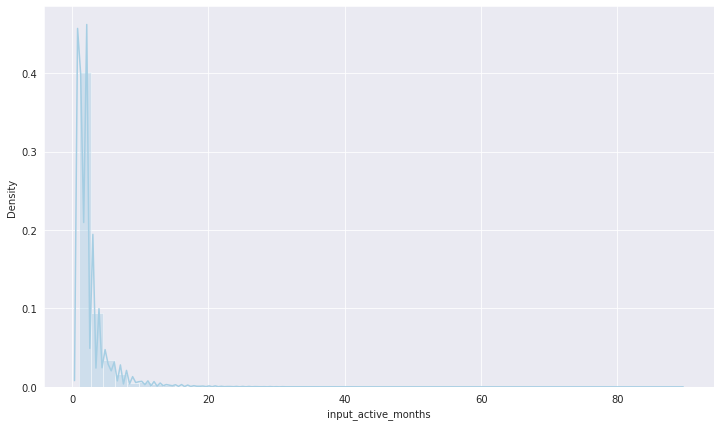

In [196]:
sns.distplot(df3.input_active_months.dropna())
plt.show()


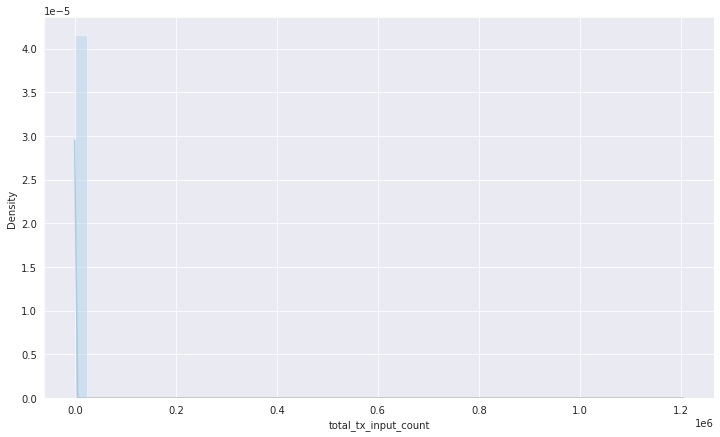

In [197]:
sns.distplot(df3.total_tx_input_count.dropna())
plt.show()









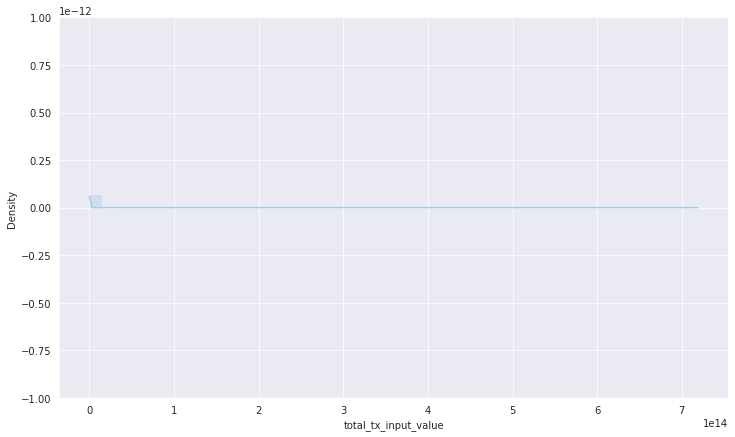

In [198]:
sns.distplot(df3.total_tx_input_value.dropna())
plt.show()

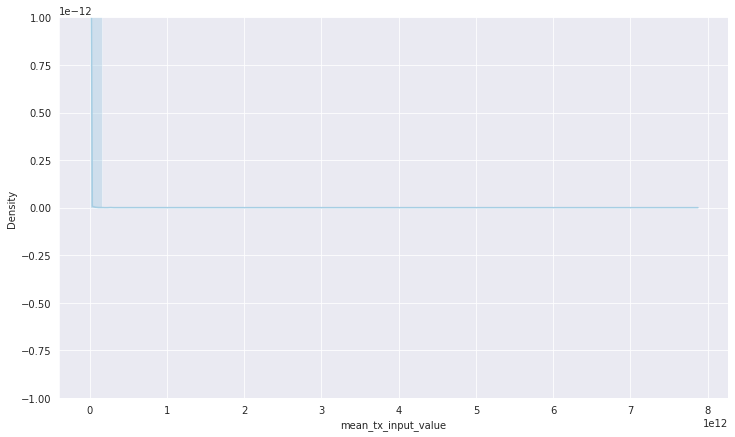

In [199]:
sns.distplot(df3.mean_tx_input_value.dropna())
plt.show()

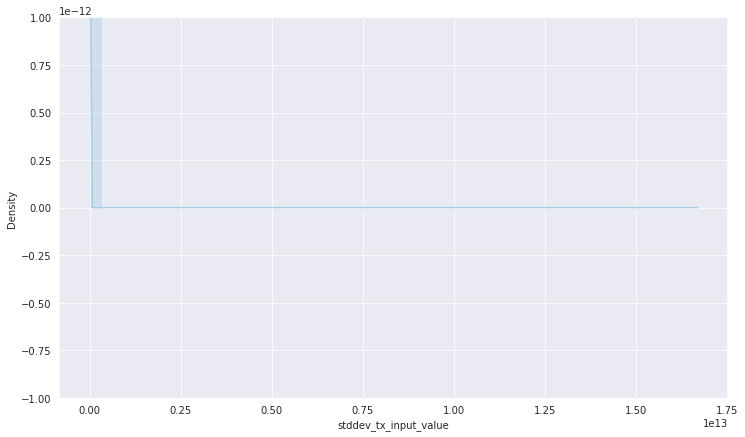

In [200]:
sns.distplot(df3.stddev_tx_input_value.dropna())
plt.show()

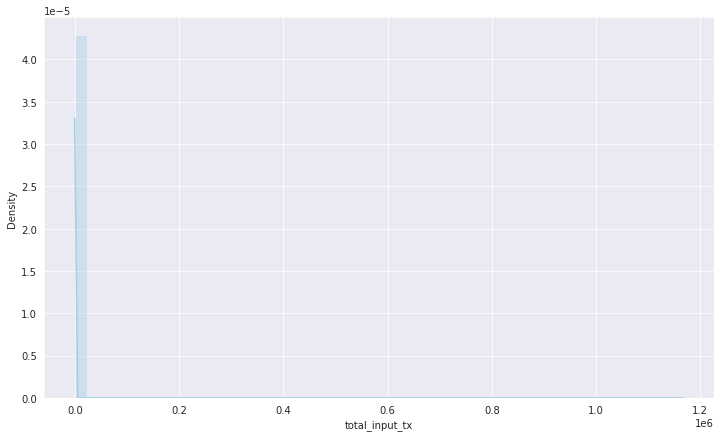

In [201]:
sns.distplot(df3.total_input_tx.dropna())
plt.show()

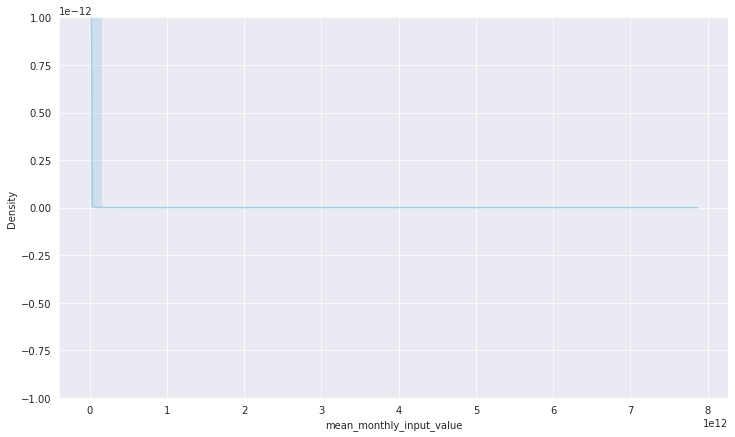

In [202]:
sns.distplot(df3.mean_monthly_input_value.dropna())
plt.show()

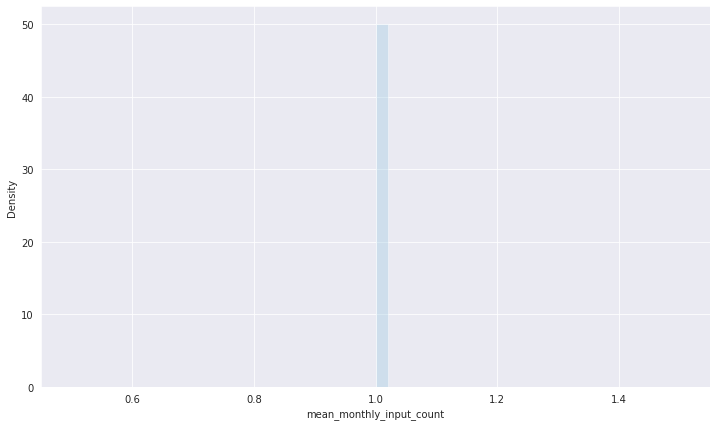

In [203]:
sns.distplot(df3.mean_monthly_input_count.dropna())
plt.show()

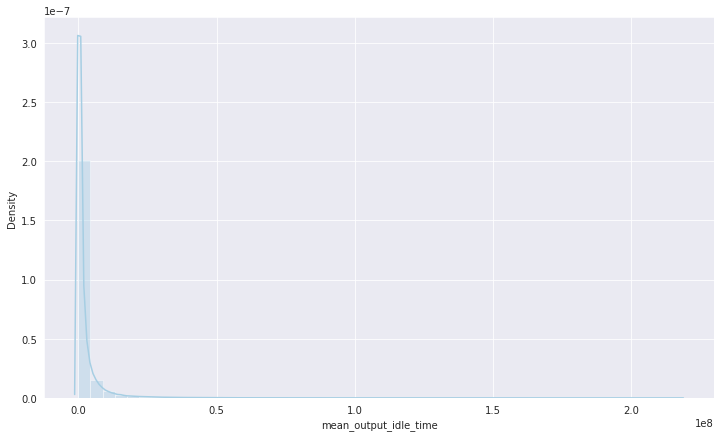

In [204]:
sns.distplot(df3.mean_output_idle_time.dropna())
plt.show()

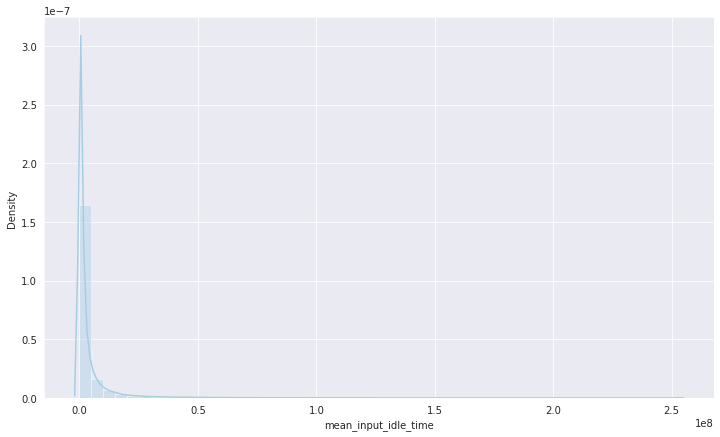

In [205]:
sns.distplot(df3.mean_input_idle_time.dropna())
plt.show()


In [206]:
X = df3.iloc[:,1:28]  #independent columns
print(df3.iloc[:,1:28])





        output_month_min  ...  mean_input_idle_time
0             1467331200  ...          3.284435e+05
1             1522540800  ...          2.421854e+06
2             1569888000  ...          1.518311e+05
3             1477958400  ...          1.505791e+07
4             1590969600  ...          5.694506e+05
...                  ...  ...                   ...
510031        1567296000  ...          1.811069e+06
510032        1504224000  ...          2.064137e+05
510033        1514764800  ...          1.631795e+06
510034        1583020800  ...          1.321870e+06
510035        1467331200  ...          2.607413e+05

[510036 rows x 26 columns]


In [207]:
Y = df3.iloc[:,0]    #target column i.e price range
print(df3.iloc[:,0])

0         2
1         2
2         2
3         2
4         2
         ..
510031    2
510032    2
510033    2
510034    2
510035    2
Name: is_miner, Length: 510036, dtype: int64


In [208]:
print(df3.head(10))
print(df3.info())





   is_miner  output_month_min  ...  mean_output_idle_time  mean_input_idle_time
0         2        1467331200  ...           1.984085e+05          3.284435e+05
1         2        1522540800  ...           2.421888e+06          2.421854e+06
2         2        1569888000  ...           1.390940e+05          1.518311e+05
3         2        1477958400  ...           2.085074e+06          1.505791e+07
4         2        1590969600  ...           2.920699e+05          5.694506e+05
5         2        1519862400  ...           7.327847e+04          8.133347e+04
6         2        1443657600  ...           3.606888e+05          4.066640e+05
7         2        1512086400  ...           7.464055e+05          7.398982e+05
8         2        1459468800  ...           1.125756e+05          1.375569e+05
9         2        1443657600  ...           4.769046e+05          5.074820e+05

[10 rows x 27 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 510036 entries, 0 to 510035
Data columns (tota


 ------------------------------------------------------

 'is_miner' had 'negative' skewness of -6.92

 Transformation yielded skewness of -6.92


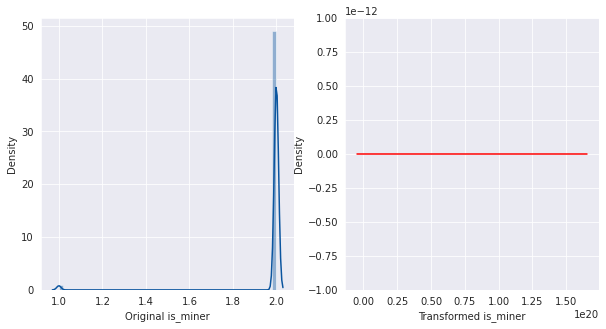


 ------------------------------------------------------

 'output_month_min' had 'negative' skewness of -0.62

 Transformation yielded skewness of -0.09


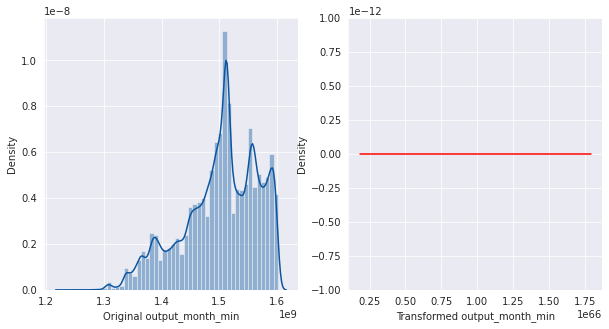


 ------------------------------------------------------

 'output_month_max' had 'negative' skewness of -0.66

 Transformation yielded skewness of -0.11


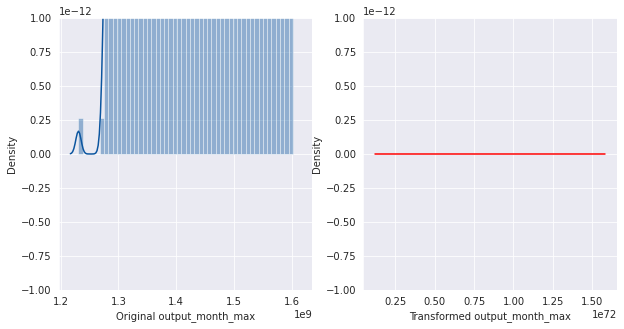


 ------------------------------------------------------

 'input_month_min' had 'negative' skewness of -0.64

 Transformation yielded skewness of -0.09


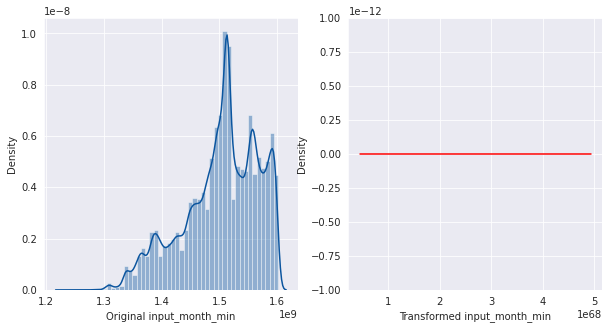


 ------------------------------------------------------

 'input_month_max' had 'negative' skewness of -0.74

 Transformation yielded skewness of -0.12


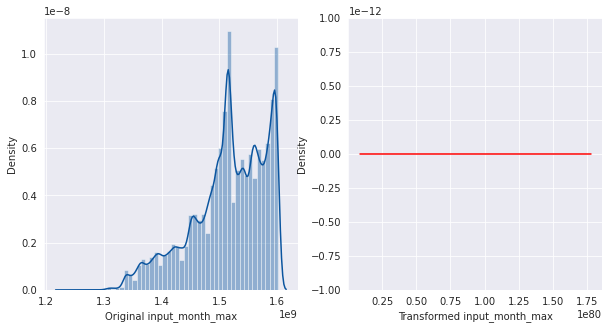


 ------------------------------------------------------

 'output_active_time' had 'positive' skewness of 3.78

 Transformation yielded skewness of -0.22


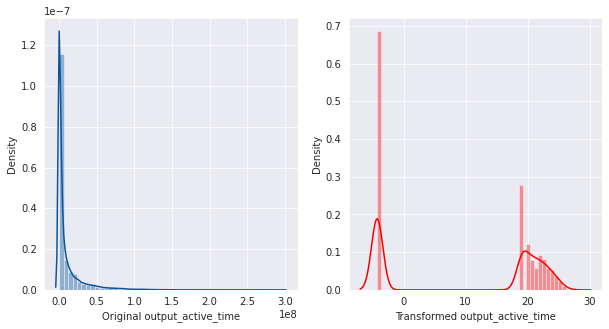


 ------------------------------------------------------

 'input_active_time' had 'positive' skewness of 3.35

 Transformation yielded skewness of -0.35


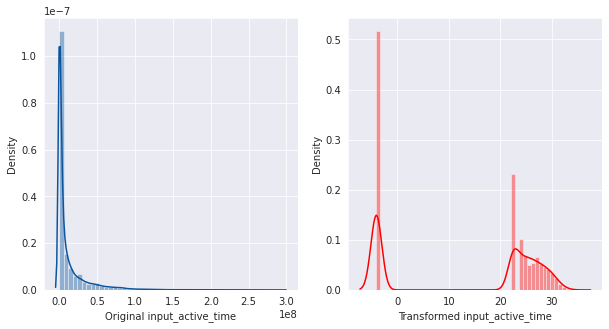


 ------------------------------------------------------

 'io_max_lag' had 'negative' skewness of -3.89

 Transformation yielded skewness of 3.27


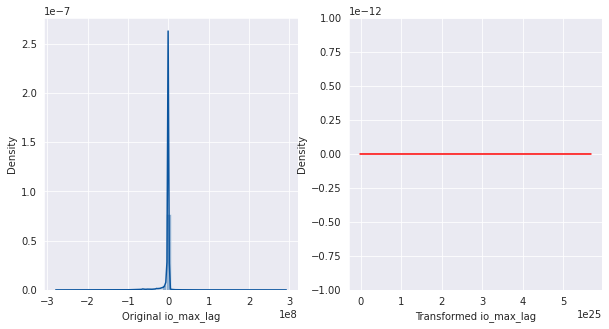


 ------------------------------------------------------

 'io_min_lag' had 'negative' skewness of -9.33

 Transformation yielded skewness of nan


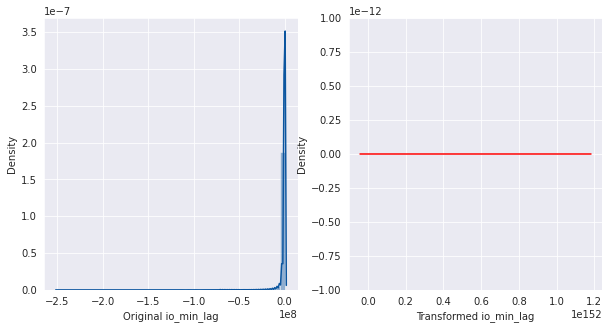


 ------------------------------------------------------

 'output_active_months' had 'positive' skewness of 5.53

 Transformation yielded skewness of 0.25


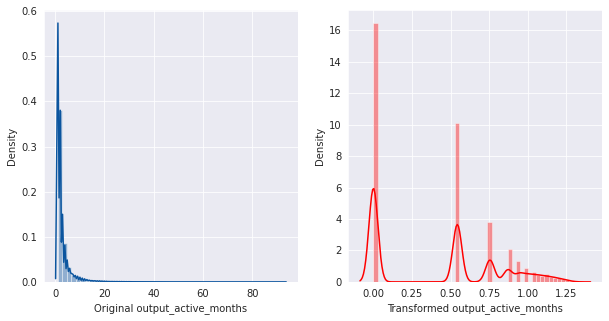


 ------------------------------------------------------

 'total_tx_output_count' had 'positive' skewness of 584.89

 Transformation yielded skewness of 0.35


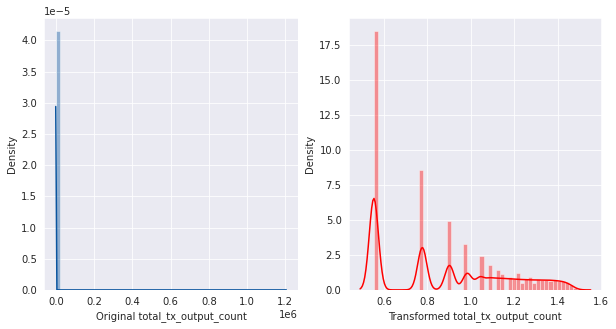


 ------------------------------------------------------

 'total_tx_output_value' had 'positive' skewness of 648.76

 Transformation yielded skewness of 0.01


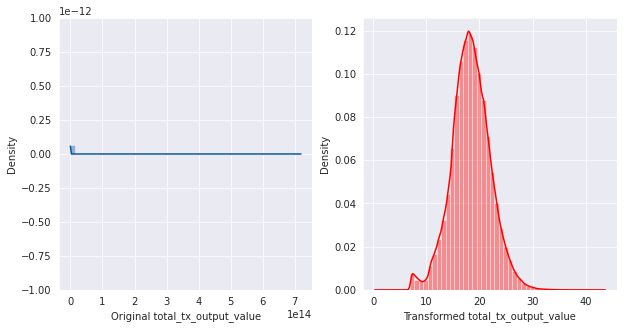


 ------------------------------------------------------

 'mean_tx_output_value' had 'positive' skewness of 533.13

 Transformation yielded skewness of 0.02


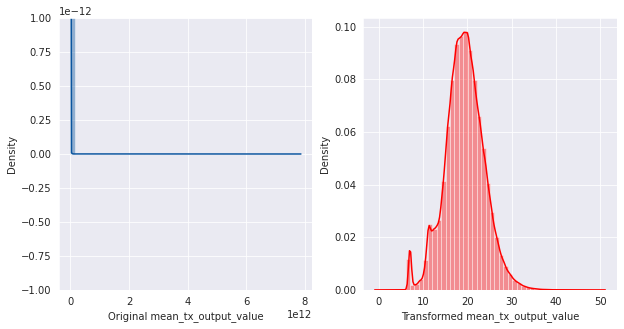


 ------------------------------------------------------

 'stddev_tx_output_value' had 'positive' skewness of 451.61

 Transformation yielded skewness of 0.12


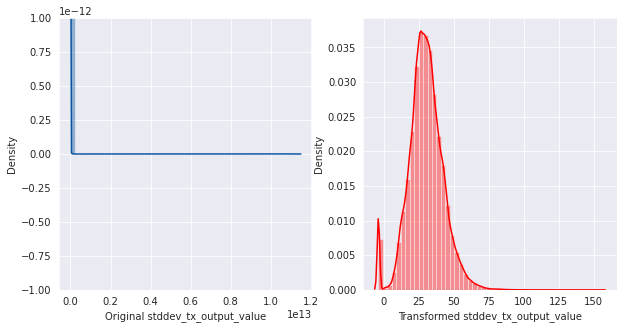


 ------------------------------------------------------

 'total_output_tx' had 'positive' skewness of 394.68

 Transformation yielded skewness of 0.35


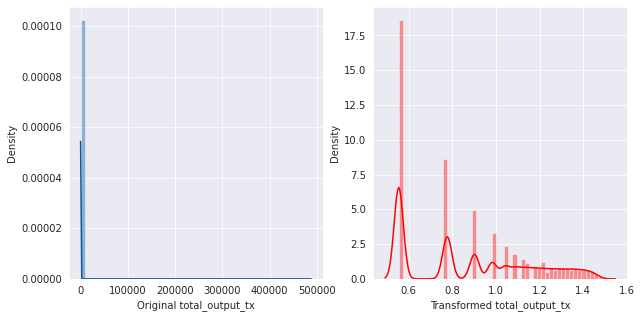


 ------------------------------------------------------

 'mean_monthly_output_value' had 'positive' skewness of 533.13

 Transformation yielded skewness of 0.02


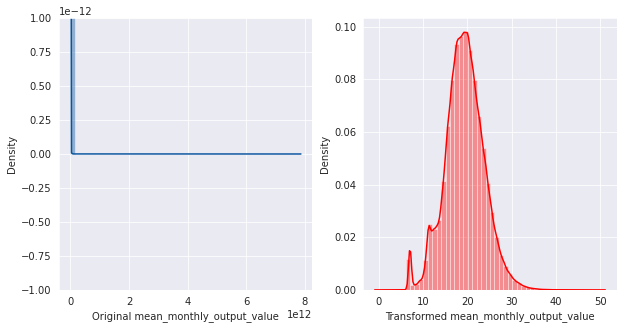


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'mean_monthly_output_count' . Skewness = 0.00


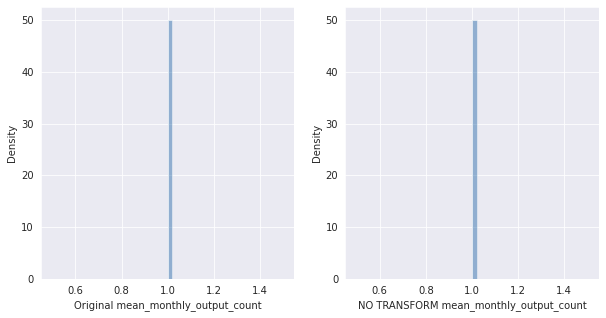


 ------------------------------------------------------

 'input_active_months' had 'positive' skewness of 5.21

 Transformation yielded skewness of 0.19


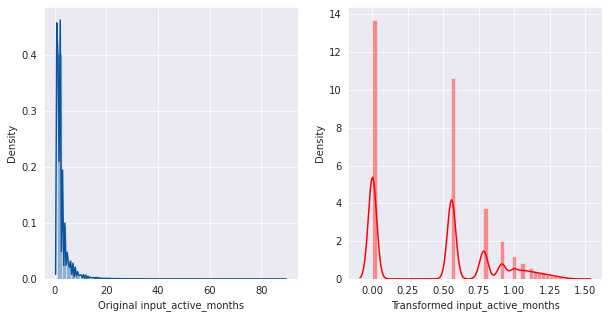


 ------------------------------------------------------

 'total_tx_input_count' had 'positive' skewness of 584.99

 Transformation yielded skewness of 0.37


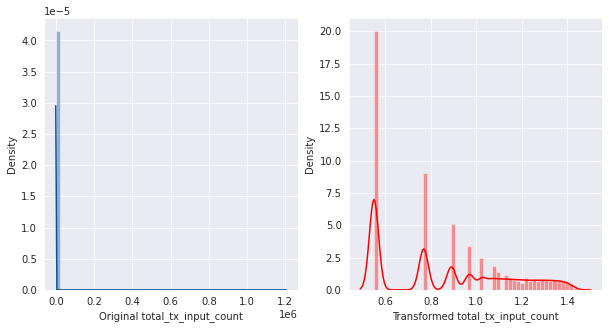


 ------------------------------------------------------

 'total_tx_input_value' had 'positive' skewness of 650.18

 Transformation yielded skewness of 0.01


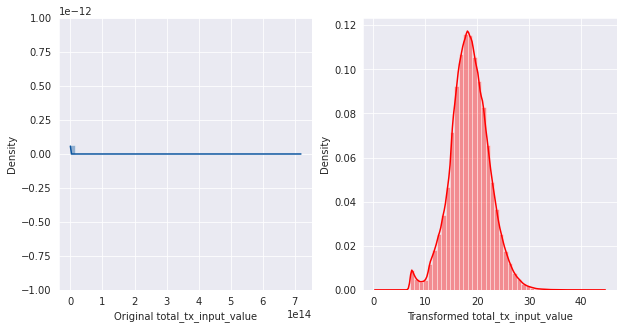


 ------------------------------------------------------

 'mean_tx_input_value' had 'positive' skewness of 391.49

 Transformation yielded skewness of 0.02


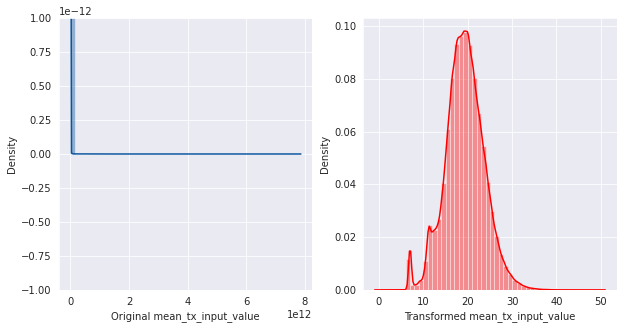


 ------------------------------------------------------

 'stddev_tx_input_value' had 'positive' skewness of 440.55

 Transformation yielded skewness of 0.11


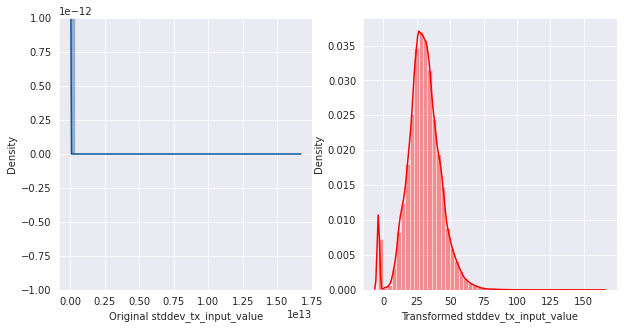


 ------------------------------------------------------

 'total_input_tx' had 'positive' skewness of 670.85

 Transformation yielded skewness of 0.39


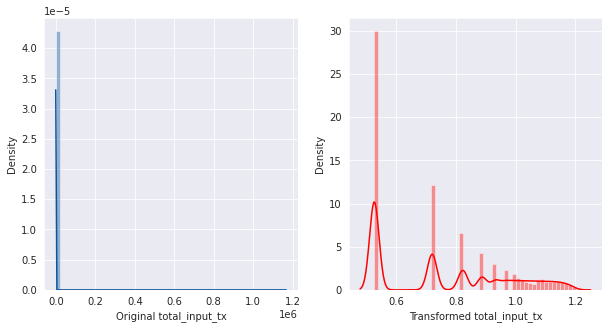


 ------------------------------------------------------

 'mean_monthly_input_value' had 'positive' skewness of 391.49

 Transformation yielded skewness of 0.02


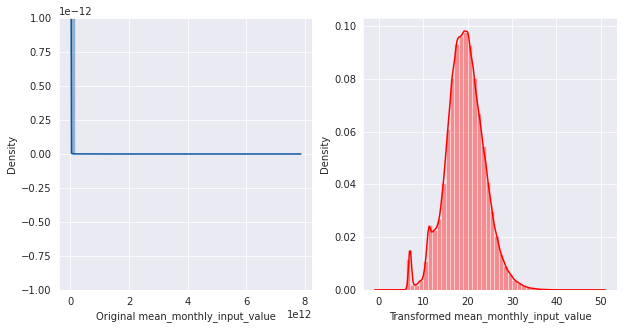


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'mean_monthly_input_count' . Skewness = 0.00


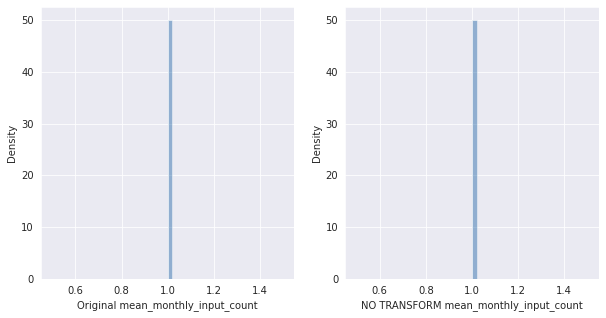


 ------------------------------------------------------

 'mean_output_idle_time' had 'positive' skewness of 8.21

 Transformation yielded skewness of -0.06


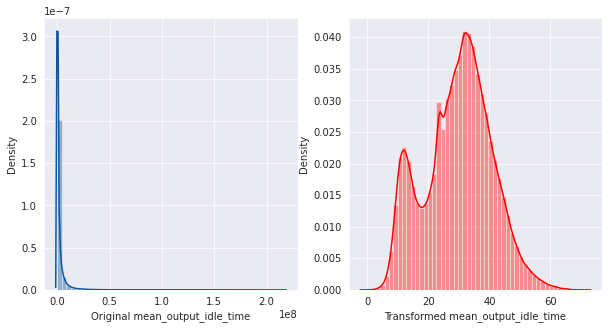


 ------------------------------------------------------

 'mean_input_idle_time' had 'positive' skewness of 6.73

 Transformation yielded skewness of -0.04


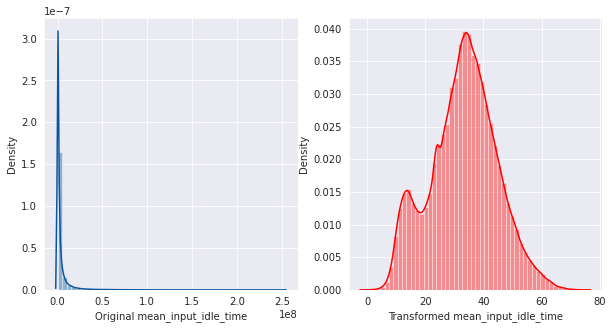

In [209]:
import seaborn as sns
import numpy as np
import math
import scipy.stats as ss
import matplotlib.pyplot as plt

def skew_autotransform(DF, include = None, exclude = None, plot = False, threshold = 1, exp = False):
    
    #Get list of column names that should be processed based on input parameters
    if include is None and exclude is None:
        colnames = DF.columns.values
    elif include is not None:
        colnames = include
    elif exclude is not None:
        colnames = [item for item in list(DF.columns.values) if item not in exclude]
    else:
        print('No columns to process!')
    
    #Helper function that checks if all values are positive
    def make_positive(series):
        minimum = np.amin(series)
        #If minimum is negative, offset all values by a constant to move all values to positive teritory
        if minimum <= 0:
            series = series + abs(minimum) + 0.01
        return series
    
    
    #Go throug desired columns in DataFrame
    for col in colnames:
        #Get column skewness
        skew = DF[col].skew()
        transformed = True
        
        if plot:
            #Prep the plot of original data
            sns.set_style("darkgrid")
            sns.set_palette("Blues_r")
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))
            ax1 = sns.distplot(DF[col], ax=axes[0])
            ax1.set(xlabel='Original ' + col)
        
        #If skewness is larger than threshold and positively skewed; If yes, apply appropriate transformation
        if abs(skew) > threshold and skew > 0:
            skewType = 'positive'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])
            
            if exp:
               #Apply log transformation 
               DF[col] = DF[col].apply(math.log)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()
         
        elif abs(skew) > threshold and skew < 0:
            skewType = 'negative'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])
            
            if exp:
               #Apply exp transformation 
               DF[col] = DF[col].pow(10)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()
        
        else:
            #Flag if no transformation was performed
            transformed = False
            skew_new = skew
        
        #Compare before and after if plot is True
        if plot:
            print('\n ------------------------------------------------------')     
            if transformed:
                print('\n %r had %r skewness of %2.2f' %(col, skewType, skew))
                print('\n Transformation yielded skewness of %2.2f' %(skew_new))
                sns.set_palette("Paired")
                ax2 = sns.distplot(DF[col], ax=axes[1], color = 'r')
                ax2.set(xlabel='Transformed ' + col)
                plt.show()
            else:
                print('\n NO TRANSFORMATION APPLIED FOR %r . Skewness = %2.2f' %(col, skew))
                ax2 = sns.distplot(DF[col], ax=axes[1])
                ax2.set(xlabel='NO TRANSFORM ' + col)
                plt.show()
                

    return DF


transformedDF = skew_autotransform(df3.copy(deep=True), plot = True, exp = False, threshold = 0.5)


In [210]:
transformedDF.reset_index(drop=True, inplace=True)

print(transformedDF.head(10))

print(transformedDF.info())
print(transformedDF.shape)



       is_miner  output_month_min  ...  mean_output_idle_time  mean_input_idle_time
0  1.606612e+20      9.091812e+65  ...              26.755184             29.415049
1  1.606612e+20      1.190099e+66  ...              38.616219             39.472950
2  1.606612e+20      1.487765e+66  ...              25.332268             26.121805
3  1.606612e+20      9.582898e+65  ...              37.805906             50.992605
4  1.606612e+20      1.639703e+66  ...              28.372041             31.953559
5  1.606612e+20      1.174922e+66  ...              22.907838             23.668169
6  1.606612e+20      8.075256e+65  ...              29.285362             30.380975
7  1.606612e+20      1.131801e+66  ...              32.609050             33.220411
8  1.606612e+20      8.742610e+65  ...              24.512166             25.721605
9  1.606612e+20      8.075256e+65  ...              30.528925             31.408400

[10 rows x 27 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51

In [211]:
X = transformedDF.iloc[:,1:27]
print(X)



        output_month_min  ...  mean_input_idle_time
0           9.091812e+65  ...             29.415049
1           1.190099e+66  ...             39.472950
2           1.487765e+66  ...             26.121805
3           9.582898e+65  ...             50.992605
4           1.639703e+66  ...             31.953559
...                  ...  ...                   ...
510031      1.469951e+66  ...             37.858817
510032      1.089596e+66  ...             27.396852
510033      1.146497e+66  ...             37.293202
510034      1.580914e+66  ...             36.171231
510035      9.091812e+65  ...             28.398254

[510036 rows x 26 columns]


In [212]:
X.columns

Index(['output_month_min', 'output_month_max', 'input_month_min',
       'input_month_max', 'output_active_time', 'input_active_time',
       'io_max_lag', 'io_min_lag', 'output_active_months',
       'total_tx_output_count', 'total_tx_output_value',
       'mean_tx_output_value', 'stddev_tx_output_value', 'total_output_tx',
       'mean_monthly_output_value', 'mean_monthly_output_count',
       'input_active_months', 'total_tx_input_count', 'total_tx_input_value',
       'mean_tx_input_value', 'stddev_tx_input_value', 'total_input_tx',
       'mean_monthly_input_value', 'mean_monthly_input_count',
       'mean_output_idle_time', 'mean_input_idle_time'],
      dtype='object')

In [213]:
X.head()

,output_month_min,output_month_max,input_month_min,input_month_max,output_active_time,input_active_time,io_max_lag,io_min_lag,output_active_months,total_tx_output_count,total_tx_output_value,mean_tx_output_value,stddev_tx_output_value,total_output_tx,mean_monthly_output_value,mean_monthly_output_count,input_active_months,total_tx_input_count,total_tx_input_value,mean_tx_input_value,stddev_tx_input_value,total_input_tx,mean_monthly_input_value,mean_monthly_input_count,mean_output_idle_time,mean_input_idle_time
0,9.091812e+65,7.786915e+71,2.442765e+68,8.230847e+79,20.233983,25.009553,6.425518e+24,1.139943e+152,0.755812,1.312368,24.912384,25.347857,51.059087,1.310344,25.347857,1,0.783829,1.282669,25.258055,25.310081,51.398524,1.114513,25.310081,1,26.755184,29.415049
1,1.190099e+66,1.346378e+72,3.229183e+68,1.488854e+80,24.283440,29.780280,6.609717e+24,1.139943e+152,1.159960,1.312368,17.077796,15.105016,24.778287,1.310344,15.105016,1,1.243878,1.282669,17.244469,15.090495,24.883049,1.117601,15.090495,1,38.616219,39.472950
2,1.487765e+66,1.311083e+72,4.069969e+68,1.445563e+80,19.090485,22.542416,6.609717e+24,1.139943e+152,0.544085,1.356764,18.183754,15.813221,17.566926,1.354522,15.813221,1,0.557395,1.323922,18.372013,15.797400,17.625180,1.125601,15.797400,1,25.332268,26.121805
3,9.582898e+65,1.437964e+72,2.946951e+68,1.624926e+80,25.587188,31.038321,6.425518e+24,1.500608e+151,1.180890,1.387517,15.669799,12.220262,18.990762,1.385106,12.220262,1,0.995649,1.352241,15.810793,12.210522,19.057404,0.964536,12.210522,1,37.805906,50.992605
4,1.639703e+66,1.515368e+72,4.501602e+68,1.697817e+80,21.376222,25.673399,6.609717e+24,1.139943e+152,0.872272,1.354320,22.227129,21.005753,34.125439,1.352091,21.005753,1,0.911738,1.321661,22.504692,20.978961,34.303449,1.094431,20.978961,1,28.372041,31.953559


In [214]:
Y = df3.iloc[:,0:1].values
print(df3.iloc[:,0:1])



        is_miner
0              2
1              2
2              2
3              2
4              2
...          ...
510031         2
510032         2
510033         2
510034         2
510035         2

[510036 rows x 1 columns]


In [215]:
print(Y)

[[2]
 [2]
 [2]
 ...
 [2]
 [2]
 [2]]


In [216]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)



print(X)





[[-0.64326988 -0.72627391 -0.67461683 ...  0.         -0.26585095
  -0.31644255]
 [ 0.22758223  1.12102722  0.1976801  ...  0.          0.81396264
   0.55976632]
 [ 1.15035322  1.00617301  1.13028166 ...  0.         -0.3953915
  -0.60333836]
 ...
 [ 0.09241323  0.4211127   0.06174116 ...  0.          0.62218725
   0.36987434]
 [ 1.4391163   1.54355111  1.42359904 ...  0.          0.2625836
   0.27213224]
 [-0.64326988 -0.72627391 -0.67461683 ...  0.         -0.15596123
  -0.40502216]]


In [217]:
X.shape

(510036, 26)

In [218]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
print(Y)
Y = ohe.fit_transform(Y).toarray()
print(Y)


[[2]
 [2]
 [2]
 ...
 [2]
 [2]
 [2]]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [219]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3)



In [220]:
y_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [221]:
y_test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [222]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)



print(X)



[[-0.64326988 -0.72627391 -0.67461683 ...  0.         -0.26585095
  -0.31644255]
 [ 0.22758223  1.12102722  0.1976801  ...  0.          0.81396264
   0.55976632]
 [ 1.15035322  1.00617301  1.13028166 ...  0.         -0.3953915
  -0.60333836]
 ...
 [ 0.09241323  0.4211127   0.06174116 ...  0.          0.62218725
   0.36987434]
 [ 1.4391163   1.54355111  1.42359904 ...  0.          0.2625836
   0.27213224]
 [-0.64326988 -0.72627391 -0.67461683 ...  0.         -0.15596123
  -0.40502216]]


In [223]:
X_train.shape

(357025, 26)

In [224]:
y_train.shape

(357025, 2)

In [225]:
X_test.shape

(153011, 26)

In [226]:
y_test.shape

(153011, 2)

In [227]:
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(16, input_dim=26, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(2, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=64)



Epoch 1/100
5579/5579 [==============================] - 6s 1ms/step - loss: 0.0838 - accuracy: 0.9639
Epoch 2/100
5579/5579 [==============================] - 6s 1ms/step - loss: 0.0146 - accuracy: 0.9942
Epoch 3/100
5579/5579 [==============================] - 6s 1ms/step - loss: 0.0141 - accuracy: 0.9944
Epoch 4/100
5579/5579 [==============================] - 6s 1ms/step - loss: 0.0139 - accuracy: 0.9944
Epoch 5/100
5579/5579 [==============================] - 6s 1ms/step - loss: 0.0137 - accuracy: 0.9944
Epoch 6/100
5579/5579 [==============================] - 6s 1ms/step - loss: 0.0136 - accuracy: 0.9946
Epoch 7/100
5579/5579 [==============================] - 6s 1ms/step - loss: 0.0129 - accuracy: 0.9949
Epoch 8/100
5579/5579 [==============================] - 6s 1ms/step - loss: 0.0131 - accuracy: 0.9946
Epoch 9/100
5579/5579 [==============================] - 6s 1ms/step - loss: 0.0132 - accuracy: 0.9948
Epoch 10/100
5579/5579 [==============================] - 6s 1ms/step - l

In [228]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))


from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)


Accuracy is: 99.56539072354276


In [231]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)


Epoch 1/100
5579/5579 [==============================] - 8s 1ms/step - loss: 0.0104 - accuracy: 0.9958 - val_loss: 0.0108 - val_accuracy: 0.9958
Epoch 2/100
5579/5579 [==============================] - 8s 1ms/step - loss: 0.0103 - accuracy: 0.9957 - val_loss: 0.0108 - val_accuracy: 0.9958
Epoch 3/100
5579/5579 [==============================] - 8s 1ms/step - loss: 0.0104 - accuracy: 0.9957 - val_loss: 0.0109 - val_accuracy: 0.9959
Epoch 4/100
5579/5579 [==============================] - 8s 1ms/step - loss: 0.0104 - accuracy: 0.9957 - val_loss: 0.0108 - val_accuracy: 0.9957
Epoch 5/100
5579/5579 [==============================] - 8s 1ms/step - loss: 0.0103 - accuracy: 0.9958 - val_loss: 0.0107 - val_accuracy: 0.9958
Epoch 6/100
5579/5579 [==============================] - 8s 1ms/step - loss: 0.0104 - accuracy: 0.9957 - val_loss: 0.0106 - val_accuracy: 0.9959
Epoch 7/100
5579/5579 [==============================] - 8s 1ms/step - loss: 0.0103 - accuracy: 0.9957 - val_loss: 0.0107 - val_ac

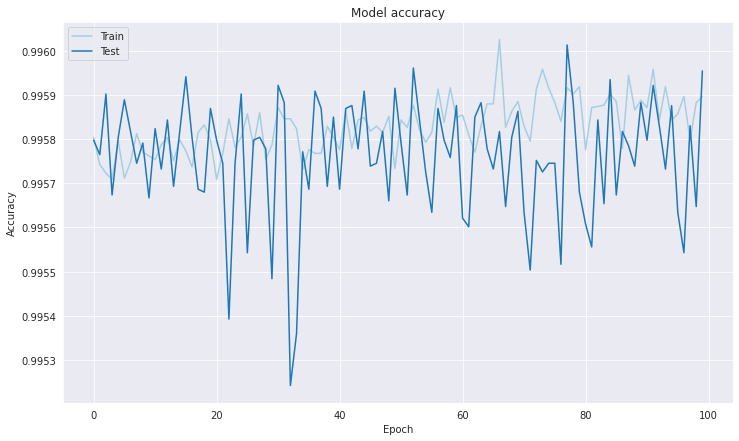

<Figure size 864x504 with 0 Axes>

In [232]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.savefig('accuracy.png')


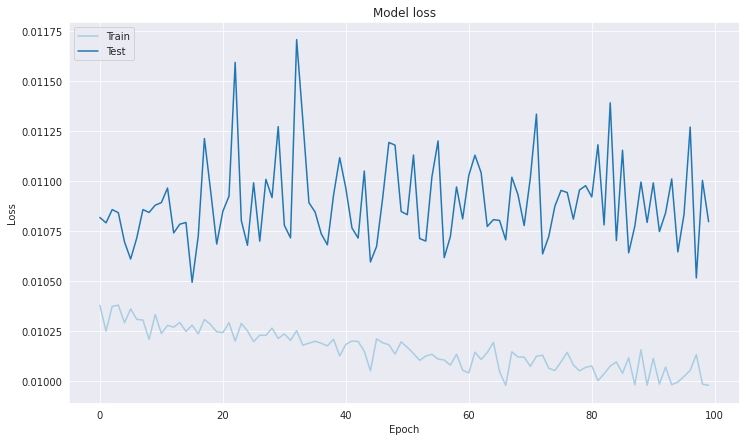

<Figure size 864x504 with 0 Axes>

In [233]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()
plt.savefig('loss1.png')

In [234]:
y_pred = model.predict(X_test)
y_pred =(y_pred>0.5)
list(y_pred)

[array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([False,  True]),
 array([False,  

In [235]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test.argmax(axis=1),y_pred.argmax(axis=1))
print(cm)



[[  2700    292]
 [   327 149692]]


[[  2700    292]
 [   327 149692]]


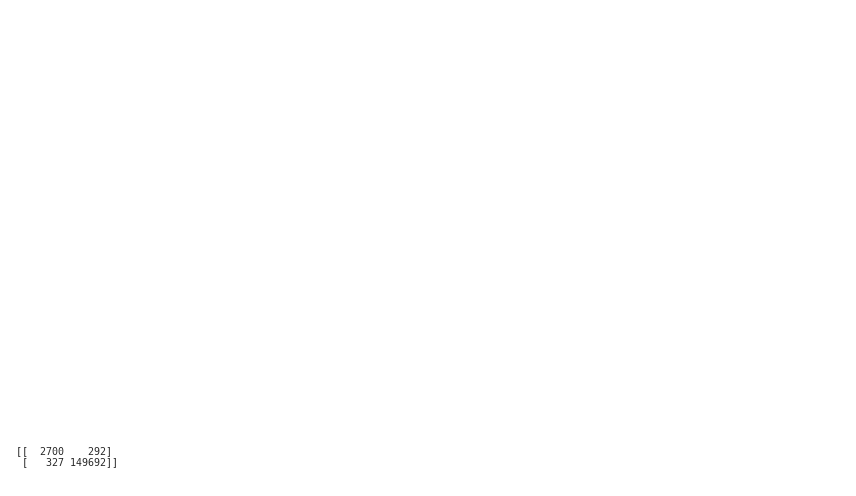

In [236]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test.argmax(axis=1),y_pred.argmax(axis=1))
print(cm)
from sklearn.metrics import classification_report
plt.rc('figure',figsize=(12,7))
plt.text(0.01,0.05,str(cm),{'fontsize':10},fontproperties='monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig('output1.png')











[1.         0.99999344 1.         ... 1.         1.         1.        ]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      2992
           1       1.00      1.00      1.00    150019

   micro avg       1.00      1.00      1.00    153011
   macro avg       0.95      0.95      0.95    153011
weighted avg       1.00      1.00      1.00    153011
 samples avg       1.00      1.00      1.00    153011



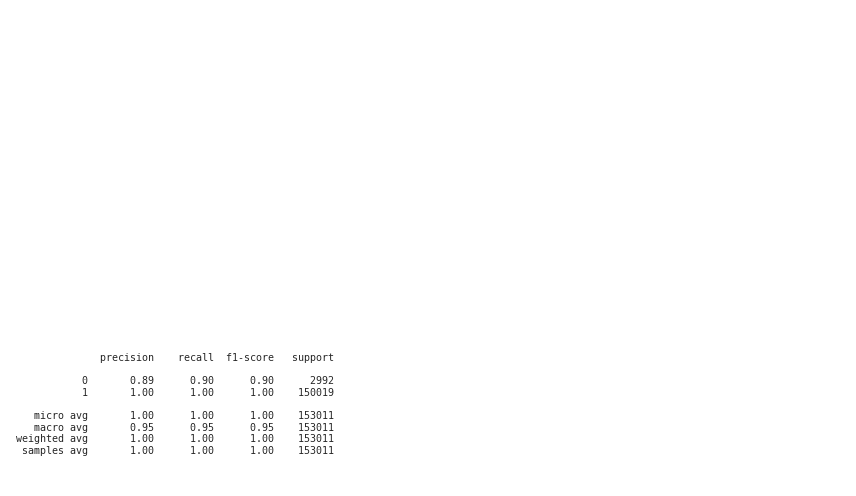

In [237]:


probs = model.predict_proba(X_test)[:,1] #positive class probabilities

print(probs)

from sklearn.metrics import classification_report
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(classification_report(y_test,y_pred)), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('output1.png')
print(classification_report(y_test,y_pred))




In [186]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
